In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode
from pyspark.sql.functions import split
from pyspark.sql.types import *
from pyspark.sql.functions import col, to_timestamp, unix_timestamp, substring, from_json
from decimal import Decimal

spark = SparkSession \
    .builder \
    .appName("StreamingPlot") \
    .getOrCreate()

tickData_schema = StructType([
    StructField('timestamp', StringType(), True),
    StructField('symbol', StringType(), True),
    StructField('side', StringType(), True),
    StructField('size', StringType(), True),
    StructField('price', StringType(), True),
    StructField('tickDirection', StringType(), True),
    StructField('trdMatchID', StringType(), True),
    StructField('grossValue', StringType(), True),
    StructField('homeNotional', StringType(), True),
    StructField('foreignNotional', StringType(), True)
])



In [2]:
df_raw = spark.readStream.option("header","false").schema(tickData_schema).csv("./output/tick_data/destination")


In [11]:
#query = df_raw.groupBy("symbol").count().writeStream.outputMode("complete").format("console").start()

query = df_raw.groupBy("symbol").count().writeStream.queryName("tick_count").outputMode("complete").format("memory").start()

#tick_count = spark.sql( 'Select symbol, count from tick_count' )






IllegalArgumentException: 'Cannot start query with name tick_count as a query with that name is already active'

In [4]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
# Only works for Jupyter Notebooks!
%matplotlib inline 

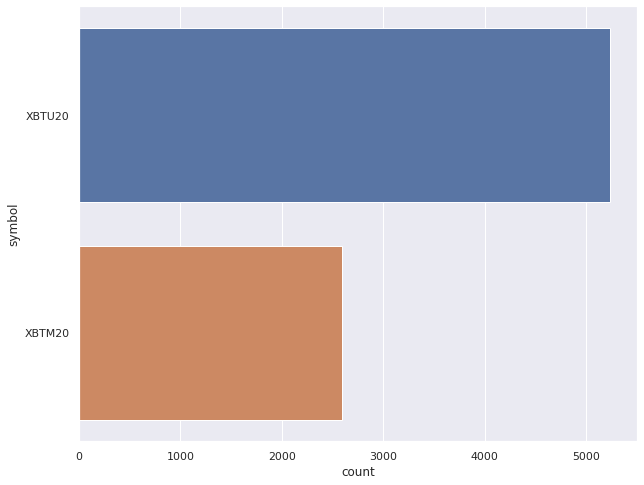

KeyboardInterrupt: 

In [12]:
count = 0
while count < 10:
    tick_count = spark.sql( 'Select symbol, count from tick_count' )
    pd_tick_count = tick_count.toPandas()
    display.clear_output(wait=True)
    sns.set()
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="symbol", data=pd_tick_count)
    plt.show()
    count = count + 1
    time.sleep( 600 )

    
query.awaitTermination()